In [63]:
#importing pandas, numpy and matplotlib.pyplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns 
pd.set_option('display.max_rows', 100) 

In [64]:
#reading all the csv files

bom_gross_df = pd.read_csv('./data/bom.movie_gross.csv.gz')
rt_info_df = pd.read_csv('./data/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews_df = pd.read_csv('./data/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies_df = pd.read_csv('./data/tmdb.movies.csv.gz')
tn_movie_budgets_df = pd.read_csv('./data/tn.movie_budgets.csv.gz')

In [65]:
rt_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [66]:
#copying my orignal dataframe to another dataframe
run_time = rt_info_df.copy()

In [67]:
#dropping the columns that I dont need.
remove_columns = ['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', 'id', 'studio', 'director']
run_time.drop(columns=remove_columns, inplace=True)


In [68]:
#datacleaning
#dropping NA from box office and runtime
run_time.dropna(subset=['box_office'], inplace=True)
run_time.dropna(subset=['runtime'], inplace=True)
run_time

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,"600,000",108 minutes
6,Comedy,"41,032,915",82 minutes
7,Drama,"224,114",123 minutes
8,Drama,"134,904",117 minutes
15,Comedy|Drama|Mystery and Suspense,"1,039,869",108 minutes
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,"25,335,935",119 minutes
1542,Comedy|Drama,"1,416,189",129 minutes
1545,Horror|Mystery and Suspense,"59,371",98 minutes
1546,Art House and International|Comedy|Drama,"794,306",97 minutes


In [69]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1 to 1555
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       338 non-null    object
 1   box_office  338 non-null    object
 2   runtime     338 non-null    object
dtypes: object(3)
memory usage: 10.6+ KB


In [70]:
#stripping minutes(unit) off from runtime column
run_time['runtime']=run_time['runtime'].str.strip(' minutes')
run_time['runtime'] = (run_time['runtime'].astype(int))
run_time

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,"600,000",108
6,Comedy,"41,032,915",82
7,Drama,"224,114",123
8,Drama,"134,904",117
15,Comedy|Drama|Mystery and Suspense,"1,039,869",108
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,"25,335,935",119
1542,Comedy|Drama,"1,416,189",129
1545,Horror|Mystery and Suspense,"59,371",98
1546,Art House and International|Comedy|Drama,"794,306",97


In [71]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1 to 1555
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       338 non-null    object
 1   box_office  338 non-null    object
 2   runtime     338 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 9.2+ KB


In [72]:
#cleaning box_office values.

def clean_a_money_column(df, series_title):
    
    df[series_title] = df[series_title].astype(str).str.replace('$','')
    df[series_title] = df[series_title].astype(str).str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

run_time = clean_a_money_column(run_time,'box_office')
display(run_time)


,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,600000,108
6,Comedy,41032915,82
7,Drama,224114,123
8,Drama,134904,117
15,Comedy|Drama|Mystery and Suspense,1039869,108
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,25335935,119
1542,Comedy|Drama,1416189,129
1545,Horror|Mystery and Suspense,59371,98
1546,Art House and International|Comedy|Drama,794306,97


In [73]:
top_50_movies=run_time['box_office'].value_counts()[0:50]

In [74]:
run_time.sort_values(by='runtime', ascending=True, inplace=True)

In [75]:
run_time

,genre,box_office,runtime
177,Action and Adventure|Drama,54983983,15
704,Comedy|Documentary|Science Fiction and Fantasy...,16302332,59
958,Animation|Kids and Family,18013938,67
747,Documentary|Special Interest,104286,70
329,Comedy,2839456,70
...,...,...,...
1117,Kids and Family|Science Fiction and Fantasy,261835892,161
787,Drama|Science Fiction and Fantasy|Romance,127490802,166
877,Action and Adventure|Science Fiction and Fantasy,303001229,170
146,Drama,1626289,188


In [76]:
run_time

,genre,box_office,runtime
177,Action and Adventure|Drama,54983983,15
704,Comedy|Documentary|Science Fiction and Fantasy...,16302332,59
958,Animation|Kids and Family,18013938,67
747,Documentary|Special Interest,104286,70
329,Comedy,2839456,70
...,...,...,...
1117,Kids and Family|Science Fiction and Fantasy,261835892,161
787,Drama|Science Fiction and Fantasy|Romance,127490802,166
877,Action and Adventure|Science Fiction and Fantasy,303001229,170
146,Drama,1626289,188


In [77]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 177 to 1350
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       338 non-null    object
 1   box_office  338 non-null    int64 
 2   runtime     338 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 9.2+ KB


In [78]:
def bin_helper(runtime):
    if runtime < 100:
        return '0-99'
    elif runtime > 140:
        return '140+'
    else:
        return '100-140'
    
    



In [79]:
run_time['run_time_binned']= run_time['runtime'].map(bin_helper)

In [80]:
run_time

,genre,box_office,runtime,run_time_binned
177,Action and Adventure|Drama,54983983,15,0-99
704,Comedy|Documentary|Science Fiction and Fantasy...,16302332,59,0-99
958,Animation|Kids and Family,18013938,67,0-99
747,Documentary|Special Interest,104286,70,0-99
329,Comedy,2839456,70,0-99
...,...,...,...,...
1117,Kids and Family|Science Fiction and Fantasy,261835892,161,140+
787,Drama|Science Fiction and Fantasy|Romance,127490802,166,140+
877,Action and Adventure|Science Fiction and Fantasy,303001229,170,140+
146,Drama,1626289,188,140+


In [81]:
rn_grouped = run_time.groupby('run_time_binned').median()

In [82]:
rn_grouped

,box_office,runtime
run_time_binned,,
0-99,12883277,91
100-140,18602895,114
140+,6100613,157


In [86]:
rn_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0-99 to 140+
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   box_office  3 non-null      int64
 1   runtime     3 non-null      int32
dtypes: int32(1), int64(1)
memory usage: 60.0+ bytes


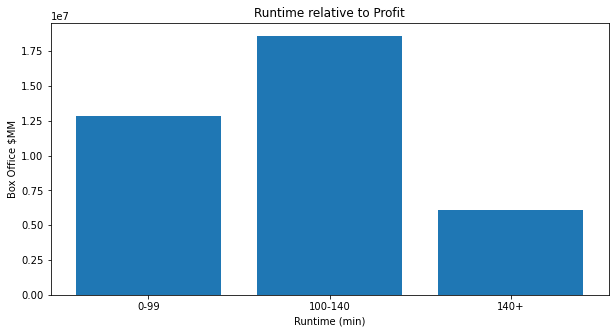

In [85]:
#scatter plot of 

x= rn_grouped.index
y= rn_grouped['box_office']
fig, ax = plt.subplots(figsize = (10,5))

ax.bar(x,y)
ax.set_title('Runtime relative to Profit')
ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Box Office $MM');